In [8]:
import numpy as np
import pandas as pd
#? pandas is a special module for read data files
from matplotlib import pyplot as plt

In [9]:
data = pd.read_csv('position_salaries_data.csv')
data.describe()
#? Statistical information about the data

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [10]:
data.info()
#? information about the data's type, num of values, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [11]:
data.head()
#? show us top 5 rows of the data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [12]:
data
#? show the all of the values

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


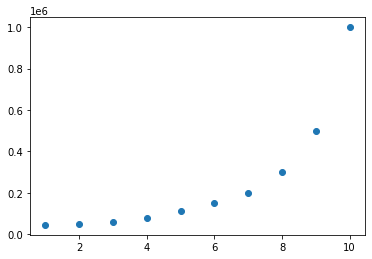

In [13]:
plt.scatter(data.iloc[:, 1], data.iloc[:, 2])
#? visualize the values to know what degree is better

In [14]:
def poly(x, degree):
    n, m = x.shape
    res = np.empty((n, m * degree + 1))
    res[:, 0] = np.ones(n)
    for i in range(1, degree + 1):
        for j in range(m):
            res[:, (i - 1) * m + j + 1] = np.power(x[:, j], i)
    return res

#? we should in first step mapping the data


# test = np.array([[2,4],[3,6]])
# test_poly = poly(test,5)
# test_poly.shape

In [15]:
x = data.iloc[:, 1:2].values
y = data.iloc[:, -1].values
y = y.reshape(-1, 1)
x_poly1 = poly(x, 1)
x_poly2 = poly(x, 2)
x_poly3 = poly(x, 3)
y_std = (y - y.min()) / (y.max() - y.min())
y_std

array([[0.        ],
       [0.0052356 ],
       [0.01570681],
       [0.03664921],
       [0.06806283],
       [0.10994764],
       [0.16230366],
       [0.26701571],
       [0.47643979],
       [1.        ]])

In [16]:
def gradient_descent(x, y, epochs, alpha, eps=0.001):
    w = np.random.randn(x.shape[1], 1)
    epoch = 1
    loss_history = []
    while True:
        y_hat = np.dot(x, w)  # Xw ==> X@w
        error = y_hat - y
        loss = (1.0 / x.shape[0]) * error.T @ error  # MSE(loss) => 1/(n)*(y_hat-y).T@(y_hat-y)
        loss_history.append(loss[0][0])
        w -= 2 * alpha * x.T @ error  # w -= alpha*X.T(Xw-y)
        if epoch % 100000 == 0:
            print(f'Epoch [{epoch}/{epochs}]: loss = {loss}')
        if epoch > epochs or loss_history[-1] < eps:
            break
        epoch += 1
    return w, loss_history

Epoch [100000/10000000]: loss = [[0.50681225]]
Epoch [200000/10000000]: loss = [[0.41151309]]
Epoch [300000/10000000]: loss = [[0.33432879]]
Epoch [400000/10000000]: loss = [[0.27181504]]
Epoch [500000/10000000]: loss = [[0.22118245]]
Epoch [600000/10000000]: loss = [[0.18017199]]
Epoch [700000/10000000]: loss = [[0.14695417]]
Epoch [800000/10000000]: loss = [[0.12004733]]
Epoch [900000/10000000]: loss = [[0.09825155]]
Epoch [1000000/10000000]: loss = [[0.08059507]]
Epoch [1100000/10000000]: loss = [[0.06629087]]
Epoch [1200000/10000000]: loss = [[0.05470159]]
Epoch [1300000/10000000]: loss = [[0.04531106]]
Epoch [1400000/10000000]: loss = [[0.03770124]]
Epoch [1500000/10000000]: loss = [[0.03153358]]
Epoch [1600000/10000000]: loss = [[0.02653391]]
Epoch [1700000/10000000]: loss = [[0.02248018]]
Epoch [1800000/10000000]: loss = [[0.01919256]]
Epoch [1900000/10000000]: loss = [[0.01652542]]
Epoch [2000000/10000000]: loss = [[0.01436081]]
Epoch [2100000/10000000]: loss = [[0.01260322]]
E

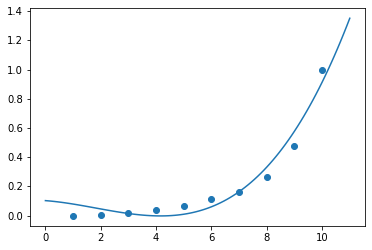

In [17]:
w, losses = gradient_descent(x_poly3, y_std, 10000000, 0.0000001)
# w
xx = np.linspace(x.min() - 1, x.max() + 1, 100).reshape(-1, 1)
xx_poly = poly(xx, 3)
yy = np.dot(xx_poly, w)
plt.scatter(x, y_std)
plt.plot(xx, yy)


In [18]:
w

array([[ 0.10195543],
       [-0.01424325],
       [-0.01129994],
       [ 0.00208375]])